<a href="https://colab.research.google.com/github/chirag3096/Project/blob/main/CHIRAG_CO2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel("/content/CO2 dataset.xlsx")

In [ ]:
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [ ]:
data.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [ ]:
data.tail()

,Year,CO2
210,2010,15.6
211,2011,15.6
212,2012,14.8
213,2013,14.7
214,2014,15.1


In [ ]:
data.shape

(215, 2)

In [ ]:
data.dtypes

Year      int64
CO2     float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [ ]:
data.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Length: 215, dtype: bool

In [ ]:
data[data.duplicated()].shape

(0, 2)

In [ ]:
data.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


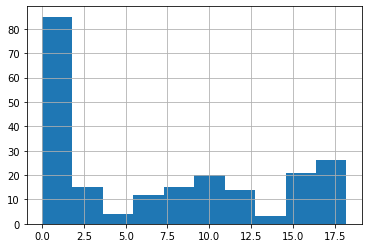

In [ ]:
data['CO2'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7fbe6b0d2150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbe6b07cad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe6b080b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe6b0805d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbe6b07c050>,
  <matplotlib.lines.Line2D at 0x7fbe6b07c590>]}

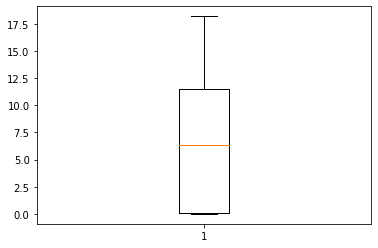

In [ ]:
data_box=data
data1_box=data_box.CO2
plt.boxplot(data1_box)

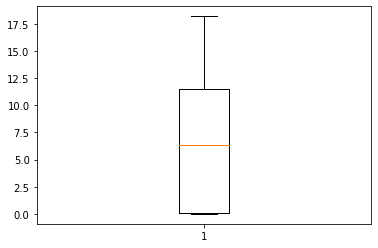

In [ ]:
box=plt.boxplot(data1_box)
plt.savefig('image1.png')

In [ ]:
[item.get_ydata() for item in box['fliers']]

[array([], dtype=float64)]

In [ ]:
[item.get_ydata()[1] for item in box['whiskers']]

[0.00175, 18.2]

In [ ]:
data.isnull().sum()

Year    0
CO2     0
dtype: int64

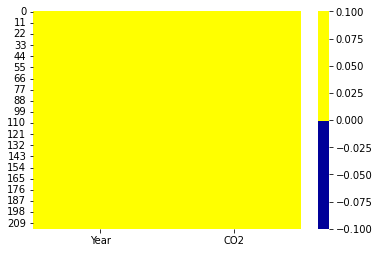

In [ ]:
cols = data.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))
plt.savefig('image2.png')

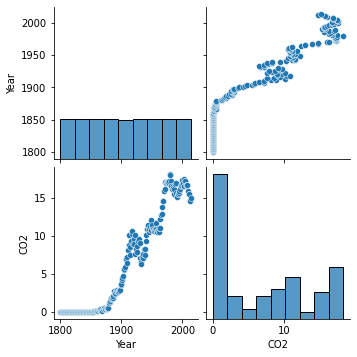

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


Linear Regression Model

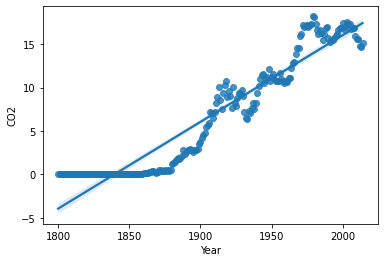

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("CO2~Year",data = data).fit()
sns.regplot(x="Year", y="CO2", data=data);

In [ ]:
model.params

Intercept   -183.451912
Year           0.099735
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues) 

Intercept   -43.391300
Year         45.009776
dtype: float64 
 Intercept    1.020579e-107
Year         8.971907e-111
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.904863141698126, 0.9044164897812158)

AIRMA Model

In [ ]:
from pandas import read_excel
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
df = read_excel('/content/CO2 dataset.xlsx', header=0, index_col=0, parse_dates=True)

In [ ]:
df

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


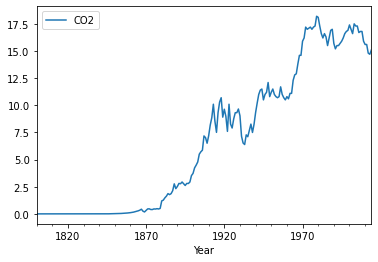

In [ ]:
# line plot of time series
from pandas import read_excel
from matplotlib import pyplot
df.plot()
pyplot.show()


In [ ]:
# separate out a validation dataset
split_point = len(df) - 10
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 205, Validation 10


In [ ]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=4.240, Expected=4.490
>Predicted=4.490, Expected=4.780
>Predicted=4.780, Expected=5.500
>Predicted=5.500, Expected=5.720
>Predicted=5.720, Expected=5.870
>Predicted=5.870, Expected=7.180
>Predicted=7.180, Expected=7.020
>Predicted=7.020, Expected=6.510
>Predicted=6.510, Expected=7.200
>Predicted=7.200, Expected=8.180
>Predicted=8.180, Expected=8.860
>Predicted=8.860, Expected=10.100
>Predicted=10.100, Expected=8.530
>Predicted=8.530, Expected=7.510
>Predicted=7.510, Expected=9.330
>Predicted=9.330, Expected=10.300
>Predicted=10.300, Expected=10.700
>Predicted=10.700, Expected=8.910
>Predicted=8.910, Expected=9.640
>Predicted=9.640, Expected=8.980
>Predicted=8.980, Expected=7.600
>Predicted=7.600, Expected=10.100
>Predicted=10.100, Expected=8.270
>Predicted=8.270, Expected=7.910
>Predicted=7.910, Expected=8.750
>Predicted=8.750, Expected=9.320
>Predicted=9.320, Expected=9.320
>Predicted=9.320, Expected=9.660
>Predicted=9.660, Expected=9.040
>Predicted=9.040, Expected=7.150
>P

ARIMA Hyperparameters

In [ ]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

Grid search for p,d,q values


In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=8.894
ARIMA(0, 0, 1) RMSE=4.724
ARIMA(0, 1, 0) RMSE=0.763
ARIMA(0, 1, 1) RMSE=0.794
ARIMA(0, 1, 2) RMSE=0.800
ARIMA(0, 2, 0) RMSE=1.108
ARIMA(0, 2, 1) RMSE=0.777
ARIMA(1, 0, 0) RMSE=0.775
ARIMA(1, 1, 0) RMSE=0.785
ARIMA(1, 2, 0) RMSE=1.007
ARIMA(2, 0, 0) RMSE=0.797
ARIMA(2, 1, 0) RMSE=0.799
ARIMA(2, 1, 1) RMSE=0.811
ARIMA(2, 2, 0) RMSE=0.928
Best ARIMA(0, 1, 0) RMSE=0.763


Build Model based on the optimized values

In [ ]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

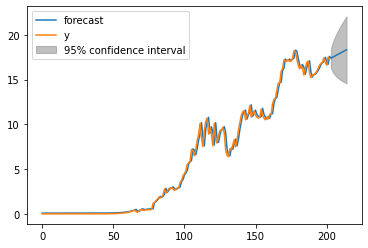

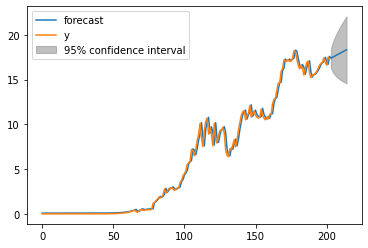

In [ ]:
# fit model
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 215)

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

2.1481814819464744

Linear model,Exponential model,Quadratic model


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 

In [ ]:
data_1= pd.read_excel("/content/CO2 dataset.xlsx")

In [ ]:
data_1['t']=np.arange(1,216)
data_1['t_Square']= t*t
data_1['log_CO2']=np.log(data_1['CO2'])

In [ ]:
data_1.head()

,Year,CO2,t,t_Square,log_CO2
0,1800,0.00568,1,1,-5.170804
1,1801,0.00561,2,4,-5.183205
2,1802,0.00555,3,9,-5.193957
3,1803,0.00548,4,16,-5.206650
4,1804,0.00542,5,25,-5.217659


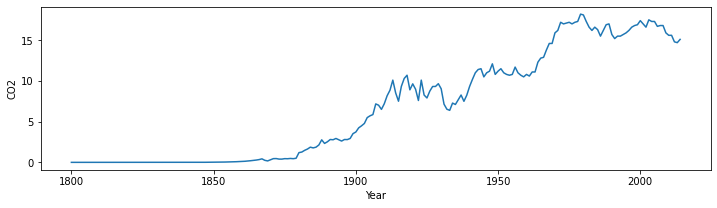

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="CO2",data=data_1)

Splitting data

In [ ]:
Train = data_1.head(175)
Test = data_1.tail(40)

In [ ]:
#Linear Model

linear_model = smf.ols('CO2~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(pred_linear))**2))
rmse_linear

2.645107899337237

In [ ]:
#Exponential

Exp = smf.ols('log_CO2~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

488.6715721509813

In [ ]:
#Quadratic 

Quad = smf.ols('CO2~t+t_Square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_Square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(pred_Quad))**2))
rmse_Quad

4.992421084464507

In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,2.645108
2,rmse_Quad,4.992421
1,rmse_Exp,488.671572


Arima model give less RSME Values,So using ARIMA model to build the Final model

Final Model

In [ ]:
#Combine train and test data and build final model
# fit model
data = read_excel('/content/CO2 dataset.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

In [ ]:
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()


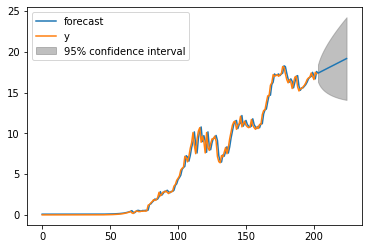

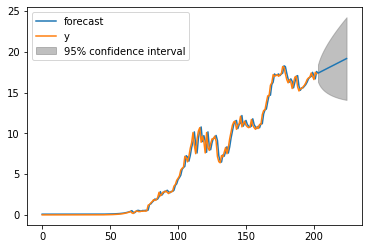

In [ ]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,225)

In [ ]:
forecast

array([17.38519404, 17.47038808, 17.55558212, 17.64077616, 17.7259702 ,
       17.81116424, 17.89635828, 17.98155232, 18.06674635, 18.15194039])